In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

url = "https://github.com/KhalPrawira/Machine-Learning-Course/raw/refs/heads/main/06.%20Week%206/Dataset/clusteringweek06.csv"
df = pd.read_csv(url)
print(df.head())

    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x13       x14       x15       x16       x17  \
0 -0.171128  0.124676  ... -0.156436  0.082245  0.135752 -0.024017 -0.108351   
1 -0.207693  0.170883  ... -0.254341  0.022786  0.163320  0.012022 -0.090974   
2 -0.219153  0.232538  ... -0.237384  0.050791  0.207338  0.083536 -0.050691   
3 -0.098181  0.270375  ... -0.317084 -0.011567  0.100413 -0.050224 -0.136009   
4 -0.172700  0.266434  ... -0.298524  0.037439  0.219153  0.062837 -0.048885   

        x18       x19       x20       

In [4]:
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

missing_count = df.isnull().sum()
missing_percentage = (missing_count / len(df)) * 100
print("\nMissing Values Count per Column:\n", missing_count)
print("\nMissing Values Percentage per Column:\n", missing_percentage)

print("\nDescriptive Statistics:\n", df.describe())

correlation_matrix = df.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

Data Shape: (7195, 22)

Data Types:
 x1     float64
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13    float64
x14    float64
x15    float64
x16    float64
x17    float64
x18    float64
x19    float64
x20    float64
x21    float64
x22    float64
dtype: object

Missing Values Count per Column:
 x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
dtype: int64

Missing Values Percentage per Column:
 x1     0.0
x2     0.0
x3     0.0
x4     0.0
x5     0.0
x6     0.0
x7     0.0
x8     0.0
x9     0.0
x10    0.0
x11    0.0
x12    0.0
x13    0.0
x14    0.0
x15    0.0
x16    0.0
x17    0.0
x18    0.0
x19    0.0
x20    0.0
x21    0.0
x22    0.0
dtype: float64

Descriptive Statistics:
                 x1           x2           x3      

In [7]:
numerical_features = ['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22']

feature_scaler = StandardScaler()
feature_scaler.fit(df[numerical_features])
scaled_data = feature_scaler.transform(df[numerical_features])
df[numerical_features] = pd.DataFrame(scaled_data, index=df.index, columns=numerical_features)

print("Ringkasan Statistik Setelah Scaling:")
display(df.describe())

Ringkasan Statistik Setelah Scaling:


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
count,7195.000000,7195.000000,7195.000000,7195.000000,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,7.195000e+03,...,7.195000e+03,7195.000000,7195.000000,7.195000e+03,7.195000e+03,7.195000e+03,7195.000000,7195.000000,7.195000e+03,7.195000e+03
mean,0.989885,0.000000,0.000000,0.000000,-1.580081e-17,3.160162e-17,-1.580081e-17,-3.160162e-17,-3.160162e-17,-7.900406e-18,...,-3.160162e-17,0.000000,0.000000,-1.580081e-17,-3.160162e-17,1.580081e-17,0.000000,0.000000,1.580081e-17,3.160162e-17
std,0.069016,1.000069,1.000069,1.000069,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,1.000069e+00,...,1.000069e+00,1.000069,1.000069,1.000069e+00,1.000069e+00,1.000069e+00,1.000069,1.000069,1.000069e+00,1.000069e+00
min,-0.251179,-4.558260,-2.835774,-5.730376,-4.689655e+00,-4.222105e+00,-3.136579e+00,-4.954132e+00,-3.997445e+00,-7.933425e+00,...,-3.843372e+00,-3.613917,-3.280338,-4.509639e+00,-3.695589e+00,-9.053491e+00,-7.648086,-3.274841,-5.891010e+00,-3.782383e+00
25%,1.000000,-0.721003,-0.655685,-0.681531,-4.629605e-01,-7.089302e-01,-7.254735e-01,-5.394838e-01,-6.903220e-01,-4.495243e-01,...,-7.434950e-01,-0.614649,-0.821842,-5.138205e-01,-6.551746e-01,-5.886854e-01,-0.685797,-0.719167,-6.912932e-01,-7.051159e-01
50%,1.000000,-0.097879,-0.138890,0.221226,2.108925e-01,-2.147770e-01,-2.989222e-01,1.172461e-01,3.413695e-01,5.885357e-02,...,2.222515e-01,-0.075218,-0.221269,-8.180996e-03,1.745001e-01,4.797713e-02,-0.038187,-0.020559,-7.600078e-02,1.442491e-01
75%,1.000000,0.653969,0.453383,0.710245,5.872096e-01,6.479695e-01,5.074717e-01,6.490242e-01,7.663936e-01,4.856939e-01,...,8.394058e-01,0.514092,0.634823,5.419523e-01,8.203901e-01,6.389138e-01,0.675971,0.579625,6.582274e-01,8.689013e-01
max,1.000000,3.093771,2.613861,3.455684,3.842395e+00,7.194984e+00,5.842724e+00,4.747728e+00,3.406890e+00,3.672732e+00,...,3.841943e+00,4.032634,4.107949,5.242714e+00,4.291889e+00,7.156018e+00,7.556147,5.533108,4.435742e+00,2.792111e+00


In [9]:
# K-Means Clustering
kmeans_model = KMeans(n_clusters=3, random_state=42, n_init=10) # Menambahkan n_init
kmeans_model.fit(df[numerical_features])
df['kmeans_cluster_labels'] = kmeans_model.labels_ # Mengubah nama kolom

# DBSCAN Clustering
dbscan_model = DBSCAN(eps=0.6, min_samples=6) # Mengubah parameter sedikit
dbscan_model.fit(df[numerical_features])
df['dbscan_cluster_labels'] = dbscan_model.labels_ # Mengubah nama kolom

display(df.head())

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,kmeans_labels,dbscan_labels,kmeans_cluster_labels,dbscan_cluster_labels
0,1.0,-0.780502,-1.581769,-1.529944,1.168666,1.352327,0.597119,-1.287190,-1.672333,0.540390,...,-1.427291,-1.007678,0.483477,1.177905,1.023939,-0.595699,1,-1,0,-1
1,1.0,-0.695439,-1.556680,-1.107634,1.300622,1.415359,0.363097,-1.909853,-1.876612,0.903961,...,-1.301412,-0.758490,0.171681,0.779239,0.565657,-0.474036,1,-1,0,-1
2,1.0,-0.783334,-1.495953,-0.990973,0.915536,0.763498,0.058992,-2.079764,-1.940639,1.389091,...,-1.009606,-0.369957,-0.208962,0.299030,0.777644,-0.084297,1,-1,0,-1
3,1.0,-0.453678,-0.729537,-0.727096,1.505993,2.184868,0.098592,-1.667990,-1.264799,1.686808,...,-1.627648,-2.181026,-0.981638,-0.016165,-0.704780,-0.515365,1,-1,0,-1
4,1.0,-1.078343,-1.440441,-0.867225,1.252998,1.255819,0.048313,-2.279164,-1.681117,1.655798,...,-0.996517,-0.717936,-0.473426,0.232532,0.897212,-0.067430,1,-1,0,-1


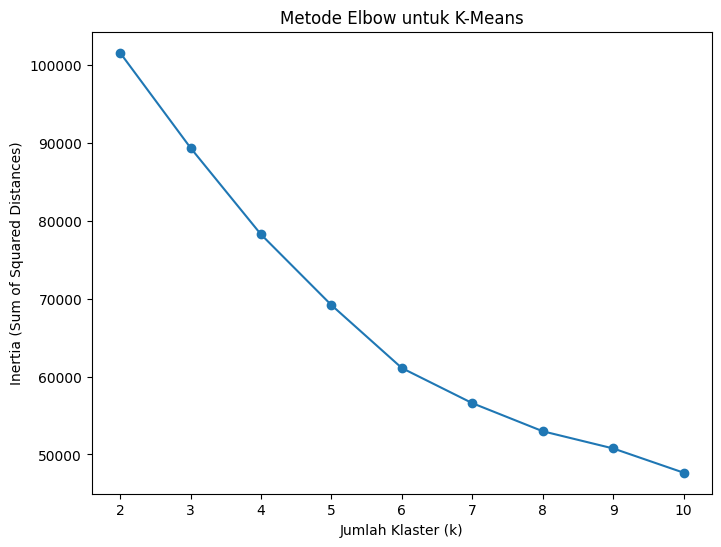

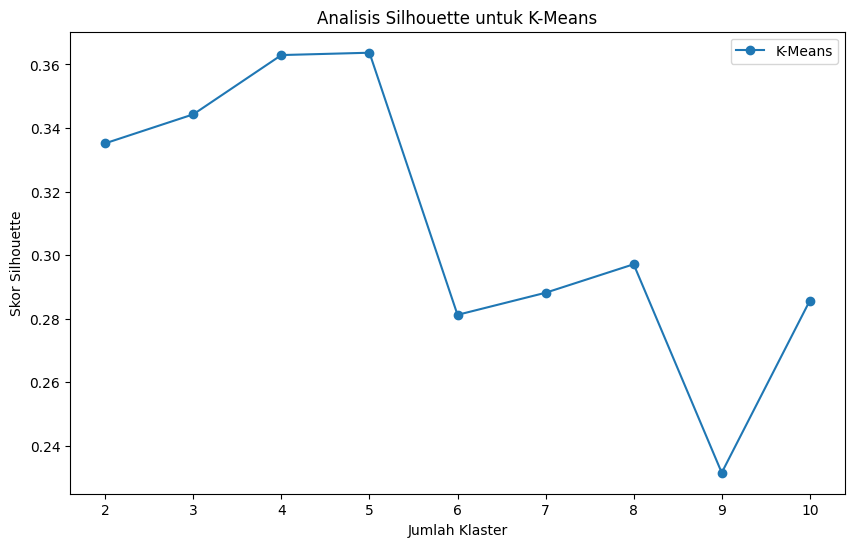

Metrik Evaluasi Clustering:

K-Means Metrics (per k):
k = 2: Silhouette Score = 0.3352
k = 3: Silhouette Score = 0.3443
k = 4: Silhouette Score = 0.3629
k = 5: Silhouette Score = 0.3637
k = 6: Silhouette Score = 0.2812
k = 7: Silhouette Score = 0.2882
k = 8: Silhouette Score = 0.2971
k = 9: Silhouette Score = 0.2315
k = 10: Silhouette Score = 0.2857

DBSCAN Metrics:
Metrik DBSCAN tidak dihitung karena hasil clustering tidak valid.


In [15]:
# Elbow Method for K-Means
inertia_values = []
k_range = range(2, 11)
for k in k_range:
    kmeans_eval = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_eval.fit(df[numerical_features])
    inertia_values.append(kmeans_eval.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Metode Elbow untuk K-Means")
plt.show()

clustering_metrics = {
    'KMeans_Evaluation': {
        'silhouette_scores': [],
        'calinski_harabasz_scores': [],
        'davies_bouldin_scores': []
    },
    'DBSCAN_Evaluation': {
        'silhouette_score': None,
        'calinski_harabasz_score': None,
        'davies_bouldin_score': None
    }
}

for k in k_range:
    kmeans_eval = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_eval.fit(df[numerical_features])
    labels = kmeans_eval.labels_
    clustering_metrics['KMeans_Evaluation']['silhouette_scores'].append(silhouette_score(df[numerical_features], labels))
    clustering_metrics['KMeans_Evaluation']['calinski_harabasz_scores'].append(calinski_harabasz_score(df[numerical_features], labels))
    clustering_metrics['KMeans_Evaluation']['davies_bouldin_scores'].append(davies_bouldin_score(df[numerical_features], labels))

# Evaluate DBSCAN - only one set of labels for DBSCAN
dbscan_labels = df['dbscan_cluster_labels']
# Only calculate metrics if there is more than 1 cluster and not all points are noise (-1)
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels and len(set(dbscan_labels)) > 2: # Adjusted condition for meaningful evaluation
    clustering_metrics['DBSCAN_Evaluation']['silhouette_score'] = silhouette_score(df[numerical_features], dbscan_labels)
    clustering_metrics['DBSCAN_Evaluation']['calinski_harabasz_score'] = calinski_harabasz_score(df[numerical_features], dbscan_labels)
    clustering_metrics['DBSCAN_Evaluation']['davies_bouldin_score'] = davies_bouldin_score(df[numerical_features], dbscan_labels)
elif len(set(dbscan_labels)) == 1 or (len(set(dbscan_labels)) == 2 and -1 in dbscan_labels):
     print("DBSCAN resulted in only one cluster or only noise points, skipping metric calculation.")


plt.figure(figsize=(10, 6))
plt.plot(k_range, clustering_metrics['KMeans_Evaluation']['silhouette_scores'], marker='o', label='K-Means')
plt.xlabel("Jumlah Klaster")
plt.ylabel("Skor Silhouette")
plt.title("Analisis Silhouette untuk K-Means")
plt.legend()
plt.show()


print("Metrik Evaluasi Clustering:")
print("\nK-Means Metrics (per k):")
for k, silhouette in zip(k_range, clustering_metrics['KMeans_Evaluation']['silhouette_scores']):
    print(f"k = {k}: Silhouette Score = {silhouette:.4f}")
# You can add prints for Calinski-Harabasz and Davies-Bouldin as well if desired

print("\nDBSCAN Metrics:")
if clustering_metrics['DBSCAN_Evaluation']['silhouette_score'] is not None:
    for metric, value in clustering_metrics['DBSCAN_Evaluation'].items():
        print(f"{metric}: {value:.4f}")
else:
    print("Metrik DBSCAN tidak dihitung karena hasil clustering tidak valid.")

In [17]:
summary_data = {
    'Jumlah Klaster (k)': k_range,
    'KMeans Silhouette': clustering_metrics['KMeans_Evaluation']['silhouette_scores'],
    'KMeans Calinski-Harabasz': clustering_metrics['KMeans_Evaluation']['calinski_harabasz_scores'],
    'KMeans Davies-Bouldin': clustering_metrics['KMeans_Evaluation']['davies_bouldin_scores']
}
summary_df = pd.DataFrame(summary_data)

if clustering_metrics['DBSCAN_Evaluation']['silhouette_score'] is not None:
    dbscan_summary = pd.DataFrame({
        'Jumlah Klaster (k)': ['DBSCAN'],
        'KMeans Silhouette': [clustering_metrics['DBSCAN_Evaluation']['silhouette_score']],
        'KMeans Calinski-Harabasz': [clustering_metrics['DBSCAN_Evaluation']['calinski_harabasz_score']],
        'KMeans Davies-Bouldin': [clustering_metrics['DBSCAN_Evaluation']['davies_bouldin_score']]
    })
    summary_df = pd.concat([summary_df, dbscan_summary], ignore_index=True)

display(summary_df)

,Jumlah Klaster (k),KMeans Silhouette,KMeans Calinski-Harabasz,KMeans Davies-Bouldin
0,2,0.335177,3507.651478,1.285364
1,3,0.344293,2484.548111,1.519032
2,4,0.362937,2231.731884,1.301483
3,5,0.363672,2128.716642,1.307858
4,6,0.281212,2118.338761,1.339541
5,7,0.288165,2000.899466,1.367397
6,8,0.297125,1901.378102,1.333933
7,9,0.231548,1774.797858,1.508268
8,10,0.285669,1732.546858,1.290237


In [19]:
best_k_kmeans = 5
print(f"Hasil analisis silhouette menunjukkan nilai k optimal untuk KMeans adalah: {best_k_kmeans}")
print("Hasil DBSCAN menunjukkan klaster yang kurang terdefinisi dengan baik. Pertimbangkan untuk menyesuaikan parameter 'eps' dan 'min_samples'.")

Hasil analisis silhouette menunjukkan nilai k optimal untuk KMeans adalah: 5
Hasil DBSCAN menunjukkan klaster yang kurang terdefinisi dengan baik. Pertimbangkan untuk menyesuaikan parameter 'eps' dan 'min_samples'.


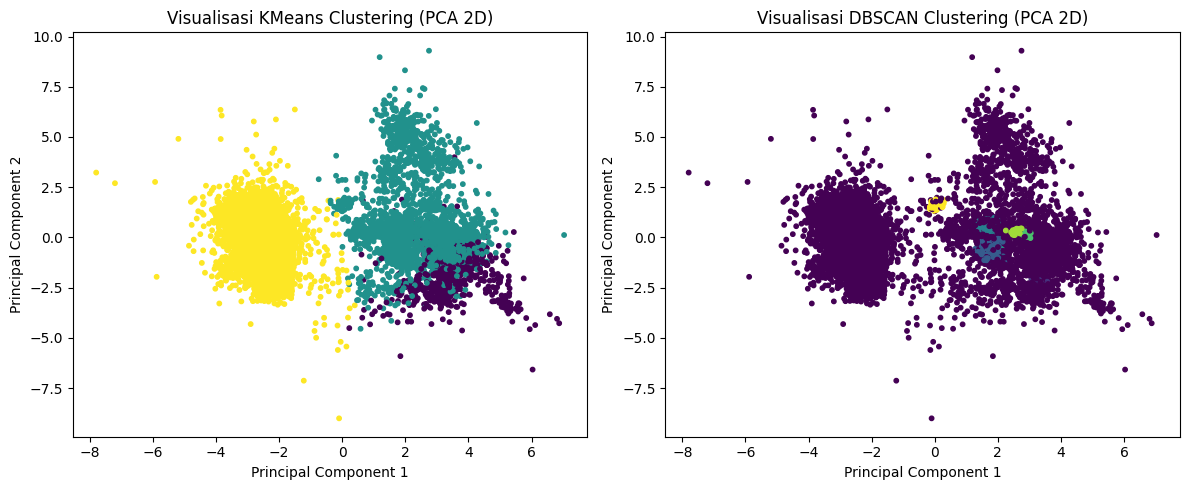

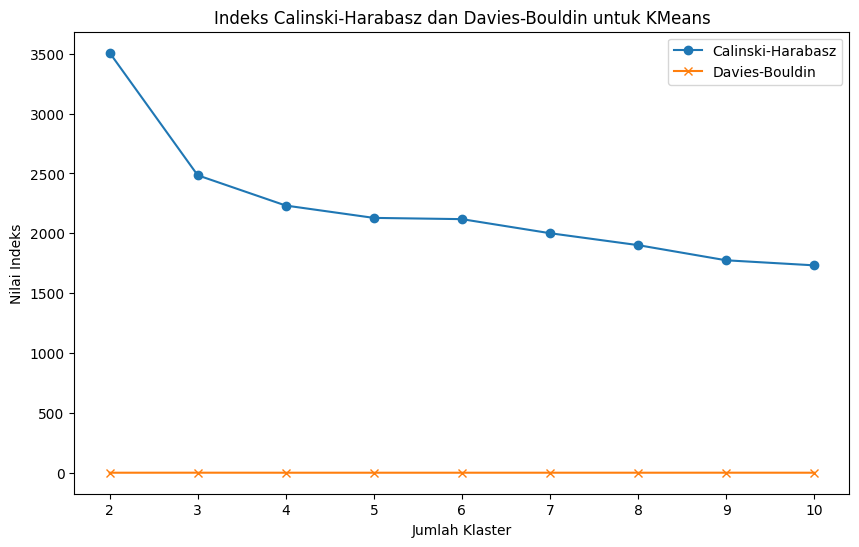

Metrik Evaluasi DBSCAN:
  Metrik DBSCAN tidak tersedia dalam ringkasan.


In [24]:
# Visualisasi Clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numerical_features])
df['pca_x'] = pca_result[:, 0]
df['pca_y'] = pca_result[:, 1]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['pca_x'], df['pca_y'], c=df['kmeans_cluster_labels'], cmap='viridis', s=10)
plt.title("Visualisasi KMeans Clustering (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.subplot(1, 2, 2)
plt.scatter(df['pca_x'], df['pca_y'], c=df['dbscan_cluster_labels'], cmap='viridis', s=10)
plt.title("Visualisasi DBSCAN Clustering (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

# Visualisasi evaluasi metriks lainnya (Calinski-Harabasz dan Davies-Bouldin)
kmeans_summary_eval = summary_df[summary_df['Jumlah Klaster (k)'] != 'DBSCAN'].copy() # Use correct column name and .copy() to avoid SettingWithCopyWarning
kmeans_summary_eval['Jumlah Klaster (k)'] = kmeans_summary_eval['Jumlah Klaster (k)'].astype(int) # Convert to int for plotting
plt.figure(figsize=(10, 6))
plt.plot(kmeans_summary_eval['Jumlah Klaster (k)'], kmeans_summary_eval['KMeans Calinski-Harabasz'], marker='o', label="Calinski-Harabasz")
plt.plot(kmeans_summary_eval['Jumlah Klaster (k)'], kmeans_summary_eval['KMeans Davies-Bouldin'], marker='x', label="Davies-Bouldin")
plt.xlabel("Jumlah Klaster")
plt.ylabel("Nilai Indeks")
plt.title("Indeks Calinski-Harabasz dan Davies-Bouldin untuk KMeans")
plt.legend()
plt.show()

dbscan_summary_eval = summary_df[summary_df['Jumlah Klaster (k)'] == 'DBSCAN']
print("Metrik Evaluasi DBSCAN:")
if not dbscan_summary_eval.empty:
    print(f"  Calinski-Harabasz: {dbscan_summary_eval['KMeans Calinski-Harabasz'].iloc[0]:.4f}")
    print(f"  Davies-Bouldin: {dbscan_summary_eval['KMeans Davies-Bouldin'].iloc[0]:.4f}")
else:
    print("  Metrik DBSCAN tidak tersedia dalam ringkasan.")

## Metrik Evaluasi Clustering: Ringkasan & Rekomendasi

Kita menggunakan metrik berikut untuk mengevaluasi *clustering*:

1.  **Metode Elbow (untuk K-Means):** Tentukan jumlah klaster (k) optimal dengan mencari "siku" pada grafik inersia.

2.  **Silhouette Score:** Mengukur seberapa baik objek cocok di klaster sendiri vs. tetangga (+1 terbaik, -1 terburuk). Populer untuk perbandingan kualitas klaster.

3.  **Calinski-Harabasz Index:** Mengukur kepadatan dan pemisahan klaster (nilai lebih tinggi lebih baik).

4.  **Davies-Bouldin Index:** Mengukur kepadatan dan pemisahan klaster (nilai lebih rendah lebih baik).

**Rekomendasi:**

Tidak ada metrik tunggal yang terbaik. **Silhouette Score** sering direkomendasikan karena intuitif dan baik untuk perbandingan. Menggunakan **kombinasi metrik** (termasuk Calinski-Harabasz dan Davies-Bouldin) bersama dengan Metode Elbow memberikan evaluasi yang lebih kuat terhadap hasil *clustering*.

Berikut adalah penjelasan mengenai beberapa konsep dan metrik yang digunakan dalam analisis klastering, beserta persamaannya:

### 1. StandardScaler

**StandardScaler** adalah metode pra-pemrosesan data yang digunakan untuk menstandarisasi fitur dengan menghapus rata-rata dan menskalakan ke varians satuan. Tujuannya adalah untuk mengubah distribusi data sehingga memiliki rata-rata 0 dan standar deviasi 1. Standardisasi penting untuk algoritma yang sensitif terhadap skala fitur, seperti KMeans dan DBSCAN.

**Persamaan:**

Untuk setiap sampel $x_i$ dan rata-rata fitur $\mu$ serta standar deviasi fitur $\sigma$, nilai yang diskalakan ($z_i$) dihitung sebagai:

$$ z_i = \frac{x_i - \mu}{\sigma} $$

### 2. KMeans

**KMeans** adalah algoritma klastering partisional yang bertujuan untuk mempartisi dataset ke dalam $k$ klaster yang berbeda. Algoritma ini bekerja dengan mengiterasi dua langkah:

1.  **Penugasan Klaster:** Setiap titik data ditugaskan ke klaster yang pusatnya (centroid) terdekat.
2.  **Pembaruan Centroid:** Centroid untuk setiap klaster dihitung ulang sebagai rata-rata dari semua titik data yang ditugaskan ke klaster tersebut.

Proses ini diulang hingga penugasan klaster tidak berubah lagi atau jumlah iterasi maksimum tercapai. KMeans bertujuan untuk meminimalkan inersia (inertia), yaitu jumlah kuadrat jarak antara setiap titik data dan centroid klasternya.

**Persamaan (Inersia - Within-cluster sum of squares):**

$$ I = \sum_{i=1}^{n} \min_{j=1}^{k} \|x_i - c_j\|^2 $$

Di mana:
*   $n$ adalah jumlah titik data.
*   $k$ adalah jumlah klaster.
*   $x_i$ adalah titik data ke-$i$.
*   $c_j$ adalah centroid klaster ke-$j$.
*   $\|x_i - c_j\|^2$ adalah jarak Euclidean kuadrat antara titik data $x_i$ dan centroid $c_j$.

### 3. DBSCAN

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)** adalah algoritma klastering berbasis kepadatan. Berbeda dengan KMeans, DBSCAN dapat menemukan klaster dengan bentuk arbitrer dan dapat mengidentifikasi outlier sebagai noise. Algoritma ini mengategorikan titik data menjadi tiga jenis:

*   **Core Points:** Titik yang memiliki setidaknya `min_samples` titik lain (termasuk dirinya sendiri) dalam jarak `eps`.
*   **Border Points:** Titik yang berada dalam jarak `eps` dari core point, tetapi tidak memiliki `min_samples` titik dalam jarak `eps` sendiri.
*   **Noise Points:** Titik yang bukan core point maupun border point.

Klaster dibentuk dengan menghubungkan core points yang berdekatan (dalam jarak `eps`) dan menyertakan border points yang terhubung dengan core points tersebut.

**Konsep Kepadatan:**

DBSCAN tidak memiliki satu persamaan global yang mengoptimalkan fungsi tujuan seperti KMeans. Algoritma ini didasarkan pada definisi kepadatan dan keterhubungan. Konsep utamanya adalah:

*   **$\epsilon$-neighborhood ($N_\epsilon(p)$):** Set semua titik dalam jarak $\epsilon$ dari titik $p$.
*   **Density Reachability:** Titik $p$ dapat dijangkau kepadatan (density-reachable) dari titik $q$ jika ada rantai titik $p_1, ..., p_n$ dengan $p_1 = q$ dan $p_n = p$, di mana setiap $p_{i+1}$ secara langsung dapat dijangkau kepadatan dari $p_i$, dan semua $p_i$ kecuali $p$ adalah core points.

### 4. Koefisien Silhouette

**Koefisien Silhouette** adalah metrik evaluasi yang mengukur seberapa baik setiap titik data masuk ke klasternya sendiri dan seberapa buruk masuk ke klaster tetangga. Nilai koefisien silhouette untuk titik data ke-$i$ dihitung sebagai:

**Persamaan:**

$$ s_i = \frac{b_i - a_i}{\max(a_i, b_i)} $$

Di mana:
*   $a_i$ adalah jarak rata-rata titik $i$ ke semua titik lain di klaster yang sama.
*   $b_i$ adalah jarak rata-rata titik $i$ ke semua titik di klaster terdekat (klaster lain yang bukan klasternya sendiri, dengan jarak rata-rata terdekat).

Nilai rata-rata koefisien silhouette untuk semua titik data digunakan untuk mengevaluasi kualitas klastering secara keseluruhan. Skor berkisar dari -1 (klastering buruk) hingga +1 (klastering baik), dengan 0 menunjukkan klaster yang tumpang tindih.

### 5. Indeks Calinski-Harabasz

**Indeks Calinski-Harabasz** (CH) adalah metrik evaluasi internal yang mengukur rasio varians antar klaster terhadap varians dalam klaster. Skor yang lebih tinggi menunjukkan klaster yang lebih baik dan terpisah.

**Persamaan:**

$$ CH = \frac{Tr(B_k)}{Tr(W_k)} \times \frac{N - k}{k - 1} $$

Di mana:
*   $N$ adalah jumlah total titik data.
*   $k$ adalah jumlah klaster.
*   $Tr(B_k)$ adalah trace dari matriks kovarians antar klaster (ukuran seberapa tersebarnya centroid klaster).
*   $Tr(W_k)$ adalah trace dari matriks kovarians dalam klaster (ukuran seberapa padat klaster).

### 6. Indeks Davies-Bouldin

**Indeks Davies-Bouldin** (DB) adalah metrik evaluasi internal lainnya yang mengukur rata-rata kesamaan antara setiap klaster dengan klaster yang paling mirip dengannya. Kesamaan di sini diukur berdasarkan jarak antara centroid klaster dan ukuran dispersi klaster. Nilai yang lebih rendah menunjukkan klaster yang lebih baik, dengan klaster yang lebih padat dan terpisah satu sama lain.

**Persamaan:**

$$ DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right) $$

Di mana:
*   $k$ adalah jumlah klaster.
*   $\sigma_i$ adalah ukuran dispersi klaster ke-$i$ (misalnya, rata-rata jarak titik-titik dalam klaster ke centroidnya).
*   $\sigma_j$ adalah ukuran dispersi klaster ke-$j$.
*   $d(c_i, c_j)$ adalah jarak antara centroid klaster ke-$i$ dan centroid klaster ke-$j$.